In [4]:
! pip install selenium
! pip install pyperclip

### 2020년 2학기 통계학과(stat) 강의평 크롤링

In [12]:
from bs4 import BeautifulSoup
import urllib.request as req
import urllib.parse as quote

import time
from random import randint

In [13]:
from selenium.webdriver.common.keys import Keys
from selenium.webdriver import ActionChains

In [14]:
from selenium import webdriver
from selenium.webdriver import ActionChains
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options

driver = webdriver.Chrome('C:/Users/Jeon Jiwoo/Desktop/chromedriver.exe')
url = "https://klue.kr/login"
driver.get(url)

In [15]:
login = {
    "id" : "______________",
    "pw" : "______________"
}

# 아이디와 비밀번호 입력
time.sleep(0.5) # 0.5초
driver.find_element_by_css_selector("#root > div > div > div > div > div > input:nth-child(1)").send_keys(login.get("id"))
time.sleep(0.5) # 0.5초
driver.find_element_by_css_selector("#root > div > div > div > div > div > input.Login__UsernameInput-sc-26dbw6-1.Login__PasswordInput-sc-26dbw6-2.fmcwVt.bYoMCL").send_keys(login.get("pw")) 

# 로그인 버튼 클릭하기
time.sleep(1.0) # 1.0초
driver.find_element_by_css_selector("#root > div > div > div > div > div > button").click()

In [16]:
name = input("검색어를 입력하세요 > ")

url_0 = "https://klue.kr/search?query=" # 검색창 클릭하는 코드로도 가능!
url_search = url_0+name
driver.get(url_search)

검색어를 입력하세요 > stat


In [17]:
import datetime
    
def doScrollDown(whileSeconds):
    start = datetime.datetime.now()
    end = start + datetime.timedelta(seconds=whileSeconds)
    while True:
        driver.execute_script('window.scrollTo(0, document.body.scrollHeight);')
        time.sleep(1)
        if datetime.datetime.now() > end:
            break

In [18]:
# 크롤링 함수 설정
def crawling(start, end):
    result = []
    user_IDs = []
    reviews = []
    recommends = []
    recommends2 = []
    
    for i in range(start, end):
        #3초간 페이지 스크롤하기
        doScrollDown(3)
        
        # 크롤링 강의 페이지로 이동
        some_tag = driver.find_element_by_xpath("""//*[@id="root"]/div/div/section[2]/div/div/ul/div/div/li[""" + str(i) + """]/a/div[2]/div[1]/p[1]""")
        action = ActionChains(driver)
        action.move_to_element(some_tag).perform()
        
        # 해당 강의 클릭하기
        time.sleep(1.0) # 1.0초
        driver.find_element_by_xpath("""//*[@id="root"]/div/div/section[2]/div/div/ul/div/div/li[""" + str(i) + """]/a/div[2]/div[1]/p[1]""").click()
        
        #페이지 스크롤하기
        last_page_height = driver.execute_script("return document.documentElement.scrollHeight") 
        while True: 
            driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);") 
            time.sleep(4.0) 
            new_page_height = driver.execute_script("return document.documentElement.scrollHeight") 
            
            if new_page_height == last_page_height: 
                break 
            last_page_height = new_page_height


        # 수업명
        driver.implicitly_wait(1)
        name = driver.find_element_by_xpath("""//*[@id="root"]/div/div/section[1]/div/div[1]/div/div[2]/p[1]""")
        result.append(name.text)
        
        
        # 교수명
        driver.implicitly_wait(1)
        professor = driver.find_element_by_xpath("""//*[@id="root"]/div/div/section[1]/div/div[1]/div/div[2]/p[2]/span[1]""")
        result.append(professor.text)
        
        
        html0 = driver.page_source
        html = BeautifulSoup(html0,'html.parser')
        
        #ID
        user_ID = html.select("#root > div > div > section.PageTemplate__SectionBlockWrapper-sc-18o6p55-2.bymUhy > div > div > div.infinite-scroll-component__outerdiv > div > div > div.EvalCardListItem__EvalTopArea-sc-1m3frnl-1.ihhAEb > div.EvalCardListItem__EvalTopRightBlock-sc-1m3frnl-3.sAWyL > div > span")
        for i in range(len(user_ID)):
            str_tmp = str(user_ID[i].text)
            user_IDs.append(str_tmp)
        
        #수강평
        review = html.select("#root > div > div > section.PageTemplate__SectionBlockWrapper-sc-18o6p55-2.bymUhy > div > div > div.infinite-scroll-component__outerdiv > div > div > p")
        for j in review:
            reviews.append(j.text)
            
            #수강 추천 여부
            for i in range(1,len(review)+1):
                driver.implicitly_wait(1)
                trs = driver.find_element_by_xpath("""//*[@id="root"]/div/div/section[3]/div/div/div[2]/div/div[""" + str(i) + """]/div[2]/span""")
                recommends.append(trs.text)
                
                for i in recommends:
                    temp = i.replace("기대 이하","이 강의를 추천하지 않음!").replace("보통","이 강의를 추천하지 않음!").replace("기대 이상","이 강의를 추천하지 않음!")
                    temp = temp.replace('\'','')
                    recommends2.append(temp)
                    
        
        driver.back()
            

    
    print('Finished')
    
    return result, user_IDs, reviews, recommends2

In [19]:
result,user_IDs,reviews,recommends2 = crawling(2,27)

Finished


In [20]:
# 크롤링 수업명/교수명
result

['기초통계학(영강)',
 '김경희',
 '기초통계학인문계전용반(자연계,통계학과 수강불가)',
 '백정민',
 '기초통계학',
 '백정민',
 '기초통계학',
 '차재형',
 '통계계산소프트웨어',
 '오찬욱',
 '통계계산소프트웨어',
 '오찬욱',
 '통계수학',
 '조영경',
 '통계계산프로그래밍',
 '오찬욱',
 '확률론입문(영강)',
 '최태련',
 '수리통계학(영강)',
 '송성주',
 '수리통계학(영강)',
 '신승준',
 '행렬이론통계학과 20학번 전용반',
 '구자용',
 '행렬이론',
 '조영경',
 '사회과학을위한통계적방법통계학과 20학번 전용반',
 '송주원',
 '사회과학을위한통계적방법',
 '허명회',
 '통계조사론입문',
 '박민규',
 '비모수통계학',
 '이재원',
 '회귀분석(영강)',
 '신승준',
 '회귀분석(영강)',
 '정윤서',
 '보험통계학(영강)',
 '송성주',
 '통계적데이터과학I(영강)',
 '최상범',
 '다변량통계분석(영강)',
 '정환',
 '베이즈통계입문',
 '최태련',
 '통계적머신러닝공과대학,정보대학 수강불가',
 '박유성',
 '선형방법론',
 '구자용']

In [31]:
import pandas as pd

class_review = pd.DataFrame(columns = ['ID','수강평', '추천 여부'])
for k in range(len(reviews)):
    new_data = {'ID': user_IDs[k], '수강평': reviews[k], '추천 여부': recommends2[k]}
    class_review = class_review.append(new_data, ignore_index=True)


In [27]:
class_review

,ID,수강평,추천 여부
0,죠니별,중학교 때 배운 stem &leaf 부터 시작하기 때문에 고등학교 과정 통계를 제대...,이 강의를 추천!
1,햐ㅇ,내용 자체가 한국에서 고등학교 졸업을 했기만 하면 다 이해할 수 있는 내용이라 어려...,이 강의를 추천!
2,뎅오푸,우선 생각보다 내용이 쉽습니다. 시험 공부부터 시작해서 과제에 시간을 많이 쓰지 않...,이 강의를 추천!
3,미련곰팅이,교수님께서 되게 친절하게 설명해주십니다. 영어로 수업을 진행하다보니 알아듣지 못하는...,이 강의를 추천!
4,칼칼한김치찌개,무난무난한 통계 강의인 것 같습니다. 저는 까먹고 과제 제출을 한번 늦게 하고 기말...,이 강의를 추천!
...,...,...,...
655,최23,믿고 듣는 자용쿠 수업~ 선형대수의 확장판을 듣는 느낌이었습니다. 퀴즈 2번 시험 ...,이 강의를 추천!
656,sdsdsdsdsqe,수업이 굉장히 어렵지만 또 교수님께서 워낙 강의를 재밌게 잘 진행해주셔서 한학기 동...,이 강의를 추천!
657,Qjehdkeidhcn,"전반적으로 내용이 매우 어려운 것은 아니나, 매우 쉬운 것은 아니었습니다. 그에 비...",이 강의를 추천!
658,골텨머머터보,"졸업을 위해 어쩔 수 없이 채웠던 통과 전공이지만,너무힘들었습니다. 기말고사에 다들...",이 강의를 추천하지 않음!


In [32]:
class_review.to_csv("./klue 강의평 크롤링.csv", encoding = "utf-8-sig")

### 2020년 2학기 수리통계학(영강) (신승준 교수님) 크롤링

In [23]:
import datetime
    
def doScrollDown(whileSeconds):
    start = datetime.datetime.now()
    end = start + datetime.timedelta(seconds=whileSeconds)
    while True:
        driver.execute_script('window.scrollTo(0, document.body.scrollHeight);')
        time.sleep(1)
        if datetime.datetime.now() > end:
            break

In [24]:
time.sleep(1.0) # 1.0초

doScrollDown(3)
some_tag = driver.find_element_by_xpath("""//*[@id="root"]/div/div/section[2]/div/div/ul/div/div/li[12]/a/div[2]/div[1]/p[1]""")
action = ActionChains(driver)
action.move_to_element(some_tag).perform()

#강의 클릭하기
driver.find_element_by_xpath("""//*[@id="root"]/div/div/section[2]/div/div/ul/div/div/li[12]/a/div[2]/div[1]/p[1]""").click()

#페이지 스크롤하기
last_page_height = driver.execute_script("return document.documentElement.scrollHeight") 
while True: 
    driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);") 
    time.sleep(2) 
    new_page_height = driver.execute_script("return document.documentElement.scrollHeight") 
    
    if new_page_height == last_page_height: 
        break 
    last_page_height = new_page_height
    
result = []

# 수업명
driver.implicitly_wait(1)
name = driver.find_element_by_xpath("""//*[@id="root"]/div/div/section[1]/div/div[1]/div/div[2]/p[1]""")
result.append(name.text)
        
# 교수명
driver.implicitly_wait(1)
professor = driver.find_element_by_xpath("""//*[@id="root"]/div/div/section[1]/div/div[1]/div/div[2]/p[2]/span[1]""")
result.append(professor.text)

html0 = driver.page_source
html = BeautifulSoup(html0,'html.parser')

#ID
user_ID = html.select("#root > div > div > section.PageTemplate__SectionBlockWrapper-sc-18o6p55-2.bymUhy > div > div > div.infinite-scroll-component__outerdiv > div > div > div.EvalCardListItem__EvalTopArea-sc-1m3frnl-1.ihhAEb > div.EvalCardListItem__EvalTopRightBlock-sc-1m3frnl-3.sAWyL > div > span")
user_IDs = []
for i in range(len(user_ID)):
    str_tmp = str(user_ID[i].text)
    user_IDs.append(str_tmp)

#수강평
review = html.select("#root > div > div > section.PageTemplate__SectionBlockWrapper-sc-18o6p55-2.bymUhy > div > div > div.infinite-scroll-component__outerdiv > div > div > p")
reviews = []
for j in review:
    reviews.append(j.text)

    #수강 추천 여부
    recommends = []
    for i in range(1,len(review)+1):
        driver.implicitly_wait(1)
        trs = driver.find_element_by_xpath("""//*[@id="root"]/div/div/section[3]/div/div/div[2]/div/div[""" + str(i) + """]/div[2]/span""")
        recommends.append(trs.text)
        
        recommends2 = []
        for i in recommends:
            temp = i.replace("기대 이하","이 강의를 추천하지 않음!").replace("보통","이 강의를 추천하지 않음!").replace("기대 이상","이 강의를 추천하지 않음!")
            temp = temp.replace('\'','')
            recommends2.append(temp)
            

In [26]:
import pandas as pd
class_review = pd.DataFrame(columns = ['ID','수강평', '추천 여부'])
for k in range(len(reviews)):
    new_data = {'ID': user_IDs[k], '수강평': reviews[k], '추천 여부': recommends2[k]}
    class_review = class_review.append(new_data, ignore_index=True)
    
class_review

,ID,수강평,추천 여부
0,전문강의평론가,"요약: 교수님께서 대싸강시대를 맞아, 수강생 전원의 동의를 얻고 국강으로 임의전환해...",이 강의를 추천!
1,asdv,어느 교수님을 듣더라도 어려운 과목. 설명 친절하게 해주시기 때문에 수업 성실하게 ...,이 강의를 추천!
2,명강조아,신교수님 수리통계학 쉽게 설명해주시고 좋아요 영강이지만 한국어로 수업이 진행되었어요...,이 강의를 추천!
3,EuLkLuE,매우 만족했던 강의입니다. 교수님이 설명을 잘해주셔서 복습 열심히 하면 시험 잘 볼...,이 강의를 추천!
4,0987654321,기말을 테이크홈으로 셤을 쳐서 나름 괜찮게 수통을 마무리할 수 있었습니다~! 이번에...,이 강의를 추천하지 않음!
5,후라보노9매,수업은 비대면으로 진행되었으며 과제는 총 6번? 나갔던것 같습니다.과제 난이도는 조...,이 강의를 추천하지 않음!
6,구글구글,코로나 때문에 온라인 실시간 강의로 진행됐습니다. 다만 출석체크는 따로 없었고 녹화...,이 강의를 추천!
7,종강종강열매,무시무시한 통계학과의 보스몹 수리통계학입니다. 전필 속성이라 졸업하려면 들어야하니 ...,이 강의를 추천하지 않음!
8,세팍타크로,한 학기동안 Kaltura를 통해 실시간으로 강의가 진행되었습니다.과제는 6차례 부...,이 강의를 추천하지 않음!
9,롑롑,"다들 송성주 교수님이 수업을 잘하신다고 하셔서 걱정이 꽤나 됐었는데, 저는 신승준 ...",이 강의를 추천!


### 토큰화

! pip install --user JPype1-1.2.0-cp38-cp38-win_amd64.whl  
! pip install konlpy  
! pip install Jpype1-py3

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import re
import urllib.request
import konlpy
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
data = pd.read_csv("./klue 강의평 크롤링.csv",index_col = [0])

In [3]:
data

,ID,수강평,추천 여부
0,죠니별,중학교 때 배운 stem &leaf 부터 시작하기 때문에 고등학교 과정 통계를 제대...,이 강의를 추천!
1,햐ㅇ,내용 자체가 한국에서 고등학교 졸업을 했기만 하면 다 이해할 수 있는 내용이라 어려...,이 강의를 추천!
2,뎅오푸,우선 생각보다 내용이 쉽습니다. 시험 공부부터 시작해서 과제에 시간을 많이 쓰지 않...,이 강의를 추천!
3,미련곰팅이,교수님께서 되게 친절하게 설명해주십니다. 영어로 수업을 진행하다보니 알아듣지 못하는...,이 강의를 추천!
4,칼칼한김치찌개,무난무난한 통계 강의인 것 같습니다. 저는 까먹고 과제 제출을 한번 늦게 하고 기말...,이 강의를 추천!
...,...,...,...
655,최23,믿고 듣는 자용쿠 수업~ 선형대수의 확장판을 듣는 느낌이었습니다. 퀴즈 2번 시험 ...,이 강의를 추천!
656,sdsdsdsdsqe,수업이 굉장히 어렵지만 또 교수님께서 워낙 강의를 재밌게 잘 진행해주셔서 한학기 동...,이 강의를 추천!
657,Qjehdkeidhcn,"전반적으로 내용이 매우 어려운 것은 아니나, 매우 쉬운 것은 아니었습니다. 그에 비...",이 강의를 추천!
658,골텨머머터보,"졸업을 위해 어쩔 수 없이 채웠던 통과 전공이지만,너무힘들었습니다. 기말고사에 다들...",이 강의를 추천하지 않음!


In [4]:
#추천 여부 : 추천 1, 추천하지 않음 0 변경
data['추천 여부'][(data['추천 여부'] == '이 강의를 추천!')] = '1' 
data['추천 여부'][(data['추천 여부'] == '이 강의를 추천하지 않음!')] = '0' 

In [5]:
data

,ID,수강평,추천 여부
0,죠니별,중학교 때 배운 stem &leaf 부터 시작하기 때문에 고등학교 과정 통계를 제대...,1
1,햐ㅇ,내용 자체가 한국에서 고등학교 졸업을 했기만 하면 다 이해할 수 있는 내용이라 어려...,1
2,뎅오푸,우선 생각보다 내용이 쉽습니다. 시험 공부부터 시작해서 과제에 시간을 많이 쓰지 않...,1
3,미련곰팅이,교수님께서 되게 친절하게 설명해주십니다. 영어로 수업을 진행하다보니 알아듣지 못하는...,1
4,칼칼한김치찌개,무난무난한 통계 강의인 것 같습니다. 저는 까먹고 과제 제출을 한번 늦게 하고 기말...,1
...,...,...,...
655,최23,믿고 듣는 자용쿠 수업~ 선형대수의 확장판을 듣는 느낌이었습니다. 퀴즈 2번 시험 ...,1
656,sdsdsdsdsqe,수업이 굉장히 어렵지만 또 교수님께서 워낙 강의를 재밌게 잘 진행해주셔서 한학기 동...,1
657,Qjehdkeidhcn,"전반적으로 내용이 매우 어려운 것은 아니나, 매우 쉬운 것은 아니었습니다. 그에 비...",1
658,골텨머머터보,"졸업을 위해 어쩔 수 없이 채웠던 통과 전공이지만,너무힘들었습니다. 기말고사에 다들...",0


In [6]:
# 데이터 중복 확인 : 없음
data['수강평'].nunique(),data['추천 여부'].nunique()

(660, 2)

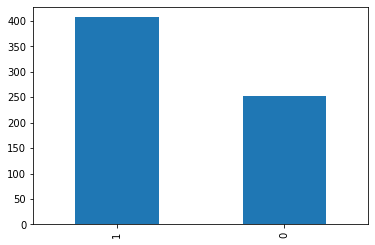

In [7]:
# 데이터 레이블 값 분포 확인
data['추천 여부'].value_counts().plot(kind = 'bar')

In [8]:
# 레이블의 분포 확인
data.groupby('추천 여부').size().reset_index(name = '개수')

,추천 여부,개수
0,0,253
1,1,407


In [9]:
# 결측치 확인
data.isnull().values.any()

False

결측치 존재하지 않음

#### 전처리

ㄱ-ㅎ, ㅏ-ㅣ 사이 글자 : https://www.unicode.org/charts/PDF/U3130.pdf  
가-힣 사이 글자 : https://www.unicode.org/charts/PDF/UAC00.pdf

In [10]:
# 한글, 영어 공백 제외하고 모두 제거하기
data['수강평'] = data['수강평'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣a-zA-Z ]","")
data[250:260]

,ID,수강평,추천 여부
250,두비두비두,이중생 기준으로는 과제 퀴즈 대비해서 문제 풀때는 어렵고 힘들었습니다 그래도 교수님...,0
251,556987,Choi Professor is so excellent His teaching st...,0
252,화팅화팅,최태련교수님은 영어를 정말 잘하시고 수학도 정말 잘하십니다 수업 초반 분은 지난 시...,0
253,DIE,감사 압도적 감사컷은 그대로였지만 시험 난이도를 폭풍 바겐세일해서 코로나 시대에 걸...,1
254,용두동자취생,교수님이 설명을 잘하시고 과제도 부담스럽지 않았습니다칼절평이라서 성적에도 다들 불만...,1
255,리리포포,배우는 것 많고 성취감 높지만 학점은 잘 주는 이상적인 전공입니다제가 이공계라서 그...,0
256,라랄라ㅏ라ㅏ라,공부하는 내용이 크게 많지 않고 이중 전공생인데도 이해가 잘 됐어요 영어가 조금 매...,0
257,여행용티슈,다 좋았는데 내 머리만 불만이었던 수업영어로 하시지만 천천히 해주시고 계속 반복해주...,0
258,통계헌터,교수님이 매주 수업 시간에 공지지난 수업 리뷰질문으로 분 동안 실시간 강의 하셨습니...,0
259,원디렉션,교수님이 영강이 아니라 한국어로 강의를 여셨으면 어땠을까 계속 생각하게 된다 그러나...,1


In [11]:
# 결측치 확인
data['수강평'] = data['수강평'].str.replace('^ +', "") # white space 데이터를 empty value로 변경
data['수강평'].replace('', np.nan, inplace=True)
print(data.isnull().sum())

ID       0
수강평      0
추천 여부    0
dtype: int64


#### 토큰화 : 형태소 분석기 - Okt(Open Korea Text), Mecab, Komoran, Hannanum, Kkma

In [12]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [13]:
okt = Okt()
okt.morphs('최태련교수님은 영어를 정말 잘하시고 수학도 정말 잘하십니다',stem = True)

['최태련', '교수', '님', '은', '영어', '를', '정말', '잘', '하다', '수학', '도', '정말', '잘', '하다']

```morphs``` : 형태소 추출  
```pos``` : 품사 태깅(part-of-speech tagging)  
```nouns``` : 명사 추출  
```stem = True ``` : 일정 수준의 정규화를 수행한다. 예) '하시고'를 '하다'로 변환

In [14]:
X_data = []
for sentence in data['수강평']:
    temp = okt.morphs(sentence,stem = True) #토큰화
    temp = [word for word in temp if not word in stopwords] #불용어 제거
    X_data.append(temp)  

In [17]:
X_data

[['중학교',
  '때',
  '배우다',
  'stem',
  'leaf',
  '부터',
  '시작',
  '때문',
  '고등학교',
  '과정',
  '통계',
  '제대로',
  '공부',
  '전혀',
  '어렵다',
  '않다',
  '설명',
  '을',
  '굉장하다',
  '쉬다',
  '자세하다',
  '영강',
  '이라',
  '전달',
  '력',
  '부족하다',
  '교수',
  '님',
  '힘들다',
  '같다',
  '중간',
  '중간',
  '숙제',
  '번',
  '있다',
  '중간',
  '기',
  '말',
  '숙제',
  '성실하다',
  '자다',
  '풀',
  '수',
  '있다',
  '수준',
  '이다'],
 ['내용',
  '자체',
  '한국',
  '에서',
  '고등학교',
  '졸업',
  '을',
  '다',
  '이해',
  '수',
  '있다',
  '내용',
  '이라',
  '어렵다',
  '부분',
  '하나',
  '없다',
  '다만',
  '교수',
  '님',
  '께서',
  '영어',
  '로',
  '전달',
  '능력',
  '조금',
  '떨어지다',
  '듯',
  '보이다',
  '아쉽다'],
 ['우선',
  '생각',
  '보다',
  '내용',
  '쉬다',
  '시험',
  '공부',
  '부터',
  '시작',
  '과제',
  '시간',
  '을',
  '많이',
  '쓰다',
  '않다',
  '좋다',
  '그만큼',
  '성취',
  '감다',
  '떨어지다',
  '시험',
  '문제',
  '과제',
  '에서',
  '내용',
  '변형',
  '시키다',
  '것',
  '뿐',
  '이어서',
  '쉽다'],
 ['교수',
  '님',
  '께서',
  '되게',
  '친절하다',
  '설명',
  '해주다',
  '영어',
  '로',
  '수업',
  '을',
  '진행',
  '보다',
  '알아듣다',
  '못',
  '것',


#### 정수 인코딩 : 텍스트를 숫자로 처리

#### 패딩 : 서로 다른 길이의 샘플들의 길이를 동일하게 맞춰주는 작업

#### 모델 적용